In [1]:
# import the libraries to use
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from imblearn.over_sampling import SMOTE

In [2]:
# load the dataset
data  = pd.read_csv('cuisine.csv')
data.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [3]:
# check the shape of the dateset
data.shape

(2448, 385)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2448.0,16040.551471,13625.719887,65.0,10907.75,15263.5,16926.25,57690.0
almond,2448.0,0.018382,0.134357,0.0,0.00,0.0,0.00,1.0
angelica,2448.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
anise,2448.0,0.000408,0.020211,0.0,0.00,0.0,0.00,1.0
anise_seed,2448.0,0.002859,0.053408,0.0,0.00,0.0,0.00,1.0
...,...,...,...,...,...,...,...,...
wood,2448.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
yam,2448.0,0.001634,0.040398,0.0,0.00,0.0,0.00,1.0
yeast,2448.0,0.015523,0.123645,0.0,0.00,0.0,0.00,1.0
yogurt,2448.0,0.059232,0.236107,0.0,0.00,0.0,0.00,1.0


In [8]:
# data.info

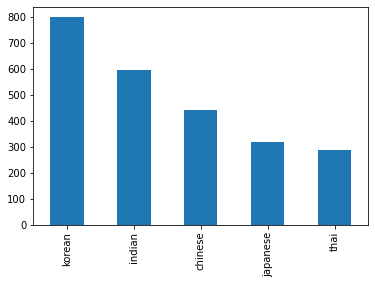

In [7]:
# check the different categoties for the label column
data.cuisine.value_counts().plot.bar()

In [9]:
# find out how much data is available per cuisine
korean_cui = data[(data.cuisine == 'korean')]
indian_cui = data[(data.cuisine == 'indian')]
chinese_cui = data[(data.cuisine == 'chinese')]
japanese_cui = data[(data.cuisine == 'japanese')]
thai_cui = data[(data.cuisine == 'thai')]

In [10]:
print(f"Korean cuisine: {korean_cui.shape}")
print(f"Indian cuisine: {indian_cui.shape}")
print(f"Chinese cuisine: {chinese_cui.shape}")
print(f"Japanese cuisine: {japanese_cui.shape}")
print(f"Thai cuisine: {thai_cui.shape}")

Korean cuisine: (799, 385)
Indian cuisine: (598, 385)
Chinese cuisine: (442, 385)
Japanese cuisine: (320, 385)
Thai cuisine: (289, 385)


In [27]:
df = thai_cui.T.drop(['cuisine','Unnamed: 0']).sum(axis=1).to_frame('value')
df.head()

,value
almond,3.0
angelica,0.0
anise,1.0
anise_seed,0.0
apple,4.0


In [28]:
df = df[(df.T !=0).any()]
df

,value
almond,3.0
anise,1.0
apple,4.0
apricot,1.0
asparagus,4.0
...,...
wine,12.0
yam,1.0
yeast,4.0
yogurt,1.0


In [29]:
def create_ingredient_df(df):
    # transpose the data, drop the columns stated, sum each column and convert the series to a dataframe
    ingredient_df = df.T.drop(['cuisine','Unnamed: 0']).sum(axis=1).to_frame('value')
    # drop the row where the value is 0
    ingredient_df = ingredient_df[(ingredient_df.T != 0).any()]
    # sort the dataframe by highest to lowest
    ingredient_df = ingredient_df.sort_values(by='value', ascending=False, inplace=False)
    return ingredient_df

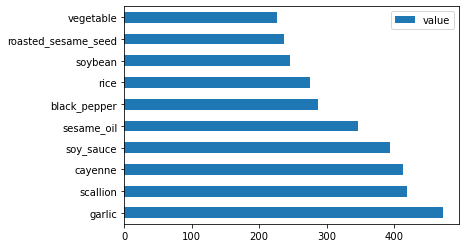

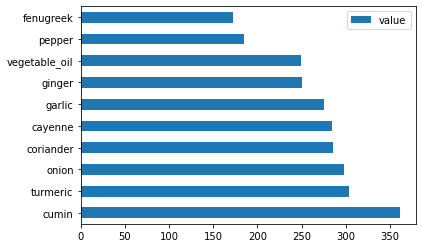

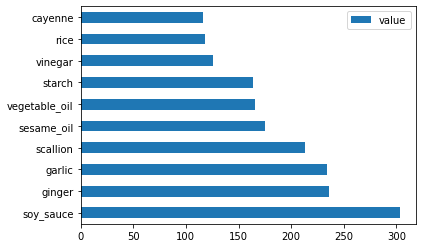

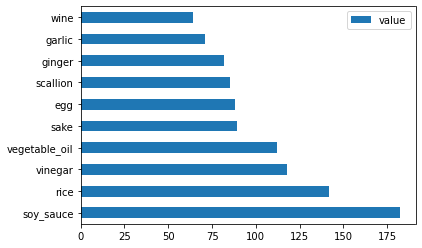

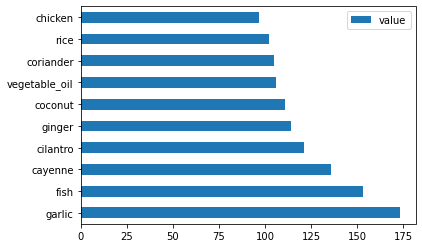

In [32]:
lst_datas = [korean_cui, indian_cui, chinese_cui, japanese_cui, thai_cui]
for lst_data in lst_datas:
    lst_data_ingridient = create_ingredient_df(lst_data)
    lst_data_ingridient.head(10).plot.barh()

In [34]:
# check the most common ingridients
common_cui = data.T.drop(['cuisine','Unnamed: 0']).sum(axis=1).to_frame('value')
common_cui.sort_values(by='value', ascending=False).head()

,value
garlic,1226.0
soy_sauce,979.0
cayenne,975.0
ginger,907.0
scallion,844.0


In [40]:
# drop the most common ingredients that create confusion between distinct cuisines
feature_df= data.drop(['cuisine','Unnamed: 0','rice','garlic','ginger'], axis=1)
labels_df = data.cuisine #.unique()
feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Balance the dataset

In [41]:
# Call fit_resample(), this strategy generates new samples by interpolation.
oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df, labels_df)

In [43]:
# check the numbers of labels per ingredient
print(f'new label count: {transformed_label_df.value_counts()}')
print(f'old label count: {data.cuisine.value_counts()}')

new label count: thai        799
korean      799
japanese    799
indian      799
chinese     799
Name: cuisine, dtype: int64
old label count: korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: cuisine, dtype: int64


In [44]:
transformed_df = pd.concat([transformed_label_df, transformed_feature_df], axis=1, join='outer')
transformed_df.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,indian,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [45]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Columns: 381 entries, cuisine to zucchini
dtypes: int64(380), object(1)
memory usage: 11.6+ MB


In [46]:
transformed_df.to_csv("cleaned_cuisine.csv")